In [91]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

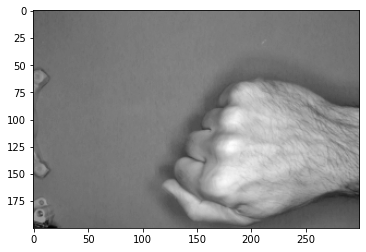

In [92]:
# This cell is used to show an image from the dataset. 
# \archive for kaggle dataset, \RPS for tensorflow dataset.

DATADIR = r"C:\Users\markn\OneDrive\Desktop\Spring 2021\CS 4662 - Advanced Machine Learning\archive"
# subfolders in RPS folder
CATEGORIES = ["rock", "paper", "scissors"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # paths to RPS dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        # changing to grayscale so its faster processing.
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [93]:
print(img_array)

[[88 88 86 ... 95 94 93]
 [87 89 86 ... 96 94 95]
 [86 87 89 ... 96 96 95]
 ...
 [28 33 60 ... 85 85 85]
 [26 28 31 ... 85 85 86]
 [26 32 31 ... 86 86 86]]


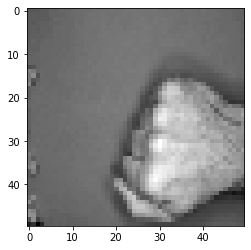

In [94]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [95]:
# creating the training set, getting the dimensions of the image, 
# and giving it a label based on it being rock, paper, or scissors.

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # paths to RPS dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [96]:
print(len(training_data))

2188


In [97]:
import random

# shuffles the training set.
random.shuffle(training_data)

In [98]:
# shows that the training set is shuffled
for sample in training_data[:10]:
    print(sample[1])

0
0
1
0
2
0
1
1
1
1


In [99]:
X = []
y = []

In [100]:
for features, label in training_data:
    X.append(features)
    y.append(label)

# import note: the 1 at the end represents grayscale. if using color,
# make sure to use 3 instead of 1. 
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [101]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example
data = y #REPLACE THIS LINE WITH YOUR ARRAY


data = array(data)
print(data)
# one hot encode
encoded = to_categorical(data)
print(encoded)
# invert encoding
inverted = argmax(encoded[0])
print(inverted)

[0 0 1 ... 0 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
0


In [102]:
X[1]

array([[[77],
        [78],
        [78],
        ...,
        [80],
        [79],
        [77]],

       [[79],
        [79],
        [78],
        ...,
        [75],
        [75],
        [73]],

       [[76],
        [80],
        [80],
        ...,
        [72],
        [71],
        [69]],

       ...,

       [[77],
        [78],
        [79],
        ...,
        [85],
        [85],
        [84]],

       [[79],
        [77],
        [78],
        ...,
        [84],
        [85],
        [83]],

       [[80],
        [77],
        [78],
        ...,
        [83],
        [82],
        [82]]], dtype=uint8)

In [103]:
print(X.shape)

(2188, 50, 50, 1)


In [104]:
print(encoded.shape)

(2188, 3)


In [105]:
model = Sequential ([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(X.shape[1:])),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=3, activation='softmax')
])

In [106]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 27651     
Total params: 46,467
Trainable params: 46,467
Non-trainable params: 0
__________________________________________________

In [107]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [108]:
model.fit(X, encoded, batch_size=32, epochs=10)

Epoch 1/10
69/69 [==============================] - 3s 31ms/step - loss: 30.2460 - accuracy: 0.4199
Epoch 2/10
69/69 [==============================] - 2s 30ms/step - loss: 0.4684 - accuracy: 0.8352
Epoch 3/10
69/69 [==============================] - 2s 30ms/step - loss: 0.3651 - accuracy: 0.8657
Epoch 4/10
69/69 [==============================] - 2s 30ms/step - loss: 0.3090 - accuracy: 0.8937
Epoch 5/10
69/69 [==============================] - 2s 31ms/step - loss: 0.2087 - accuracy: 0.9329
Epoch 6/10
69/69 [==============================] - 2s 30ms/step - loss: 0.1689 - accuracy: 0.9565
Epoch 7/10
69/69 [==============================] - 2s 32ms/step - loss: 0.1472 - accuracy: 0.9493
Epoch 8/10
69/69 [==============================] - 2s 31ms/step - loss: 0.1390 - accuracy: 0.9599
Epoch 9/10
69/69 [==============================] - 2s 30ms/step - loss: 0.1173 - accuracy: 0.9642
Epoch 10/10
69/69 [==============================] - 2s 31ms/step - loss: 0.1004 - accuracy: 0.9671


In [109]:
model.evaluate(X, encoded)

69/69 [==============================] - 1s 7ms/step - loss: 0.1549 - accuracy: 0.9461


[0.15488441288471222, 0.9460694789886475]